In [1]:
import pandas as pd

In [2]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPag = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

# Análise Preliminar

In [4]:
dfClientes.sample(5)

,id,nome,sexo,dt_nasc
145,146,Breno Rocha,M,11/25/1959
685,686,Danilo Ferreira,M,3/26/1973
937,938,Vitoria Castro,F,3/5/1968
989,990,Julia Castro,F,9/12/1971
396,397,Estevan Cardoso,M,6/26/1975


In [5]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [6]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [7]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [8]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<Axes: >

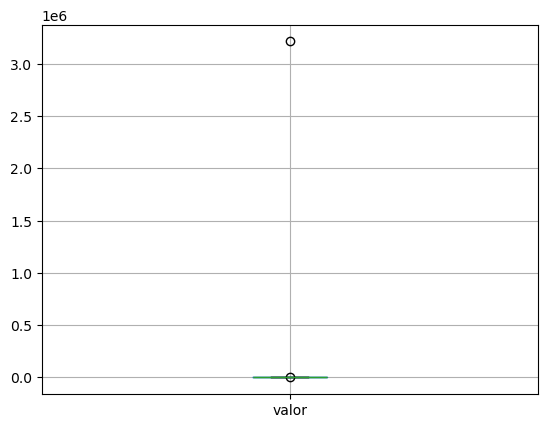

In [9]:
dfProdutos.boxplot(column=['valor'])

In [10]:
dfProdutos[dfProdutos.valor>3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


In [11]:
dfProdutos[dfProdutos.valor < 3000000].boxplot(column=['valor'])

<Axes: >

In [12]:
dfVendas[dfVendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [13]:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


In [14]:
dfPag.describe()

,id,id_venda,dt_pgto
count,2072.000000,2072.000000,2072
mean,1036.500000,1491.731660,2019-06-06 05:37:45.637065472
min,1.000000,1.000000,2018-01-10 00:00:00
25%,518.750000,746.250000,2018-10-01 12:00:00
50%,1036.500000,1501.500000,2019-06-10 00:00:00
75%,1554.250000,2220.500000,2020-02-08 00:00:00
max,2072.000000,2997.000000,2020-11-03 00:00:00
std,598.279199,864.865583,NaN


# Data Cleanning

## Dados Nulos

In [17]:
dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2020'

In [18]:
dfClientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,1/1/2020
287,288,Victor Ribeiro,O,12/17/1974


In [19]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [20]:
dfPag.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

## Outliers

In [22]:
dfProdutos.loc[9,'valor'] = dfProdutos.valor[9]/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


In [23]:
dfProdutos.boxplot(column=['valor'])

<Axes: >

## Consistência

In [25]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [26]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [27]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [28]:
dfPag[~dfPag.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


In [29]:
dfVendas[~dfVendas.id.isin(dfPag.id_venda)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

## Dados Duplicados

In [31]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [32]:
dfClientes[dfClientes.nome=='Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [33]:
dfClientes.drop('id', axis=1).duplicated().sum()

0

In [34]:
dfProdutos.produto.duplicated().sum()

0

In [35]:
dfLojas.cidade.duplicated().sum()

0

In [36]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [37]:
dfVendas[(dfVendas.id_cliente==559) & (dfVendas.id_loja==2) & (dfVendas.id_produto==5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [38]:
dfPag.drop('id', axis=1).duplicated().sum()

0

## Formato de dados

In [40]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


## Indexes

In [42]:
dfClientes = dfClientes.set_index('id')
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [43]:
dfClientes.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
      dtype='int64', name='id', length=1000)

In [44]:
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPag = dfPag.set_index('id')

In [45]:
dfProdutos.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='id')

# Data Fusion

In [47]:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(dfLojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')

In [48]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [49]:
dfClientes.loc[393]

nome             Gustavo Silva
sexo                         M
dt_nasc    1950-01-04 00:00:00
Name: 393, dtype: object

In [50]:
df = df.join(dfPag.set_index('id_venda'))

In [51]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [52]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

# Feature Engineering

In [54]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [55]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [56]:
import numpy as np
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1,'Y'))
df

ValueError: Unit Y is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

# Análise de Vendas e Receitas

## Lojas que mais vendem

In [ ]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')

## Produtos que mais vendem

In [ ]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produto')

## Receita por Loja

In [ ]:
graf_dados = df[['loja_cidade','produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
graf_dados

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')

In [ ]:
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean(), graf_dados[graf_dados!=graf_dados.max()].mean()))

## Receita por produto

In [ ]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
graf_dados

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')

## Subplots

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por produto')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
graf_dados = df[['loja_cidade','produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')
plt.xticks(rotation=90)

plt.tight_layout()

## Receita por cliente

In [ ]:
graf_dados = df[['cliente_nome','produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)
graf_dados

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Receita por Cliente')

In [ ]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(graf_dados.index, graf_dados.values, color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color='C1')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.title('Receita por Cliente')

In [ ]:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
receita_acumulada[receita_acumulada<0.60].count()/receita_acumulada.count()

## Pareto

In [ ]:
graf_dados = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index, graf_dados.values, color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Pareto de receita por produto')

## Receita combinando produto-loja

In [ ]:
graf_dados = pd.DataFrame(columns=('loja','produto','receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = graf_dados.append({
            'loja': cidade,
            'produto': produto,
            'receita': df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto==produto)].sum()
        }, ignore_index=True)
graf_dados

In [ ]:
import seaborn as sns
graf_dados = graf_dados.pivot_table(index='loja', columns='produto', values='receita', aggfunc='sum')
sns.heatmap(graf_dados)

In [ ]:
graf_dados = pd.DataFrame(columns=('loja','produto','receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = graf_dados.append({
            'loja': cidade,
            'produto': produto,
            'receita': df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto==produto)].sum()
        }, ignore_index=True)
graf_dados = graf_dados.sort_values(by="receita", ascending=False)
graf_dados

In [ ]:
graf_dados['lojaprod'] = graf_dados.loja + '-' + graf_dados.produto
graf_dados

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.receita>0.01*graf_dados.receita.max()], graf_dados.receita[graf_dados.receita>0.01*graf_dados.receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por loja-produto')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Análise de tempo

## Tempo médio de pagamento

In [ ]:
df.tempo_pg.mean()

In [ ]:
df.boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento')

In [ ]:
import seaborn as sns
sns.histplot(data=df.tempo_pg, kde=True)
plt.title('Histograma para tempo de pagamento')

In [ ]:
df.tempo_pg.describe()

## Tempo de pagamento por cidade e produto

In [ ]:
df.groupby('loja_cidade').mean().tempo_pg

In [ ]:
plt.figure(figsize=(7,4))
df[['loja_cidade','tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('produto_produto').tempo_pg.mean()

In [ ]:
plt.figure(figsize=(7,4))
df[['produto_produto','tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplt para tempo de pagamento por produto')
plt.xticks(rotation=90)
plt.show()

## Sazonalidade

In [ ]:
#plotar média móvel da receita
plt.figure(figsize=(15,5))
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Média móvel (30 dias) de receita')
plt.show()

In [ ]:
#plotar média móvel da receita por cidade
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','loja_cidade','dt_venda']].groupby(['dt_venda','loja_cidade']).sum().rolling(30).mean().unstack().plot(ax=ax)

In [ ]:
#plotar média móvel da receita por produto
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','produto_produto','dt_venda']].groupby(['dt_venda','produto_produto']).sum().rolling(30).mean().unstack().plot(ax=ax)

In [ ]:
# criando uma nova coluna contendo o ano da venda
df['venda_ano'] = pd.DatetimeIndex(df.dt_venda).year

In [ ]:
# tendencia de receita por ano
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','venda_ano']].groupby(['venda_ano']).sum().unstack().plot(ax=ax)

In [ ]:
# tendência por produto
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor','produto_produto','venda_ano']].groupby(['venda_ano','produto_produto']).sum().unstack().plot.bar(ax=ax)

In [ ]:
# tendência por cidade
fig, ax = plt.subplots(figsize=(15,5))
df[['produto_valor','loja_cidade','venda_ano']].groupby(['venda_ano','loja_cidade']).sum().unstack().plot.bar(ax=ax)

## Tempo médio de pagamento por promoção

In [ ]:
#lendo arquivo CSV
dfPromo = pd.read_csv('caso_estudo_venda_promocao.csv', sep=";")
#definir index
dfPromo = dfPromo.set_index('id_venda')
#join entre df e dfPromo
df = df.join(dfPromo)
df

In [ ]:
graf_dados = df[['promoção','tempo_pg']][~df.tempo_pg.isnull()]
graf_dados.groupby('promoção').boxplot(column=['tempo_pg'])
plt.show()

In [ ]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==0], kde=True)
plt.title('Tempo médio de pagamento para casos sem promoção')
plt.show()

In [ ]:
sns.histplot(data=graf_dados.tempo_pg[graf_dados['promoção']==1], kde=True)
plt.title('Tempo médio de pagamento para casos com promoção')
plt.show()

# Análise de inadimplência

## Inadimplência por Loja

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Inadimplência por lojas')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
graf_dados = df.groupby('loja_cidade').mean().pg.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Porcentagem de pagamento por loja')
plt.xticks(rotation=90)

plt.show()

## Inadimplência por produto

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
graf_dados = df[df.pg==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Inadimplência por produto')

plt.subplot(1,2,2)
graf_dados = df.groupby('produto_produto').mean().pg.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Porcentagem de pagamento por produto')
                        
plt.show()

## Inadimplência por idade

In [ ]:
graf_dados = df[['cliente_idade','pg']].groupby('cliente_idade').mean().sort_values('cliente_idade')
graf_dados.plot()

In [ ]:
df[df.cliente_idade<1]

## Mapa de calor de inadimplência

In [ ]:
import seaborn as sns
graf_dados = df.pivot_table(index='produto_produto', columns='loja_cidade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados, annot=True)
plt.show()

In [ ]:
import seaborn as sns
graf_dados = df.pivot_table(index='loja_cidade', columns='cliente_idade', values='pg', aggfunc='mean')
sns.heatmap(graf_dados)
plt.show()

In [ ]:
df

# Machine Learning

## Alvo

In [ ]:
dfML = df[['cliente_sexo','loja_cidade','produto_produto','produto_valor','cliente_idade','promoção','pg']]
dfML = dfML.replace([' ','-'],'_', regex=True)
dfML

## Normalização

In [ ]:
dfML['produto_valor'] = dfML['produto_valor']/dfML['produto_valor'].max()
dfML['cliente_idade'] = dfML['cliente_idade']/dfML['cliente_idade'].max()
dfML

## Dados categóricos

In [ ]:
col_cat = ['cliente_sexo','loja_cidade','produto_produto','promoção']
dfML_dummies = pd.get_dummies(dfML[col_cat].astype(str), drop_first=False)
dfML_dummies

In [ ]:
dfML = pd.concat([dfML, dfML_dummies], axis=1) 
dfML = dfML.drop(col_cat, axis=1)
dfML

## Dados de treinamento e de teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

y = dfML.pg
X = dfML.drop(['pg'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_new = X.loc[[2997,2998]]
X_new

## Regressão Logística

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

all_col_with_plus = ' + '.join(dfML.drop(['pg'], axis=1).columns)
modelo = smf.glm(formula='pg ~ ' + all_col_with_plus, data=dfML,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

In [ ]:
model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(X_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

In [ ]:
model.predict(X_new)

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(X_train,y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['targetNo','targetYes'],
                   filled=True)

In [ ]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

In [ ]:
model.predict(X_new)

## Redes Neurais

In [ ]:
from keras import Sequential
from keras.layers import Dense
import keras
import tensorflow
tensorflow.random.set_seed(2)

model = Sequential()
model.add(Dense(15, activation='relu', kernel_initializer='random_normal', input_dim=len(X.columns)))
model.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=128, epochs=300, verbose=False)

In [ ]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict_classes(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict_classes(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict_classes(X_test)))

In [ ]:
model.predict(X_new)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

In [ ]:
model.predict(X_new)